In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pytransit import QuadraticModel
from decimal import Decimal
import emcee
import corner
from IPython.display import display, Math
import csv 
from numpy import savetxt
from numpy import loadtxt
from multiprocessing import Pool
import pandas as pd
import os

s_per_day=24*3600.
M_sun=1.989e33 #g
R_sun=6.955e10 #cm
G=6.673e-8          ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
g_per_MEarth=5.972e+27      ##units: g
cm_per_REarth=6.37e8 #cm 
cm_per_RSun=6.955e10

In [9]:
#Reading in the lightcurve from the CSV file
data = loadtxt('/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs_tic272759551/Triangle_ratio_1.4_velocity_0.4.csv', delimiter=',',skiprows=1)
time=data[:,0][:-60]
flux=data[:,1][:-60]
flux_err=data[:,2][:-60]


Estimated Parameters (rp_over_rstar, a): 1.5 4.049595959595959


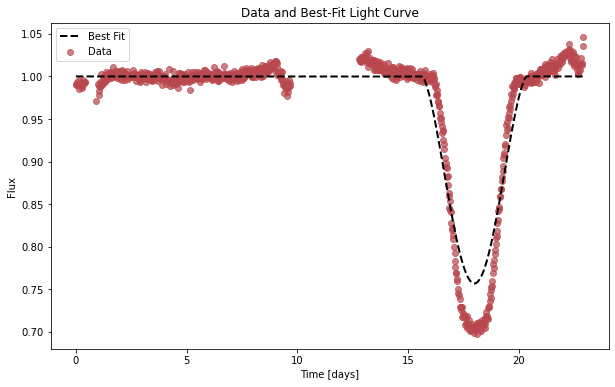

Best-fit Reduced Chi-Squared: 8.472828784883848


In [344]:
def log_likelihood(rp, a, time, flux, flux_err):
    # Calculate the light curve using the QuadraticModel with given rp, a, and other fixed parameters
    tm = QuadraticModel()
    tm.set_data(time)
    i = 90.0  # Fixed inclination angle (90 degrees)
    lightcurve = tm.evaluate(k=rp, ldc=[0.4, 0.0], t0=18, p=30, a=a, i=i)

    # Compute the log-likelihood using the Gaussian likelihood for Gaussian noise
    residuals = flux - lightcurve  # Compute the residuals
    chi_squared = np.sum((residuals / flux_err) ** 2)  # Calculate the chi-squared value
    log_likelihood_value = -0.5 * chi_squared - 0.5 * len(time) * np.log(2 * np.pi) - np.sum(np.log(flux_err))
    return log_likelihood_value


# Define the parameter grid for rp and a
rp_values = np.linspace(0.01, 1.5, 100)  # Example grid for rp values from 0.01 to 0.1
a_values = np.linspace(0.01, 50, 100)        # Example grid for a values from 1 to 5

# Perform the grid search
max_log_likelihood = -np.inf
best_rp = None
best_a = None

for rp in rp_values:
    for a in a_values:
        # Calculate the log-likelihood for the current parameter combination
        current_log_likelihood = log_likelihood(rp, a, time, flux, flux_err)

        # Update the maximum log-likelihood and best parameters if a better combination is found
        if current_log_likelihood > max_log_likelihood:
            max_log_likelihood = current_log_likelihood
            best_rp = rp
            best_a = a

# best_rp and best_a now contain the estimated parameters from the grid search
print("Estimated Parameters (rp_over_rstar, a):", best_rp, best_a)

tm = QuadraticModel()
tm.set_data(time)
i = 90.0  # Fixed inclination angle (90 degrees)
best_fit_lightcurve = tm.evaluate(k=best_rp, ldc=[0.4, 0.0], t0=18, p=30, a=best_a, i=i)

# Plot the data and the best-fit light curve
plt.figure(figsize=(10, 6))
plt.scatter(time, flux, color='xkcd:dusty red', label='Data', alpha=0.7)
plt.plot(time, best_fit_lightcurve, '--k', label='Best Fit', linewidth=2)
plt.xlabel('Time [days]')
plt.ylabel('Flux')
plt.legend(loc='best')
plt.title('Data and Best-Fit Light Curve')
plt.show()

# Calculate the number of data points and fitted parameters
N = len(flux)
k = 2  # Number of fitted parameters (rp and a)

# Calculate the log-likelihood for the best-fit parameters
best_log_likelihood = log_likelihood(best_rp, best_a, time, flux, flux_err)

# Calculate the best-fit light curve using the best-fit parameters
best_fit_lightcurve = tm.evaluate(k=best_rp, ldc=[0.4, 0.0], t0=18, p=30, a=best_a, i=i)

# Compute the residuals and chi-squared value for the best-fit model
residuals_best_fit = flux - best_fit_lightcurve
chi_squared_best_fit = np.sum((residuals_best_fit / flux_err) ** 2)


# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared_best_fit / (N - k)

# Print the results
print("Best-fit Reduced Chi-Squared:", reduced_chi_squared)

1916.5028945335723
[]


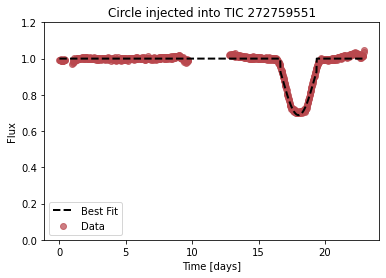

60114.40519946138
[]


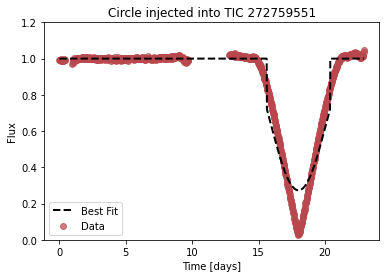

6756.898737919026
[]


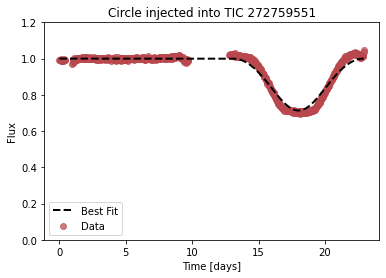

2346.062619505941
[]


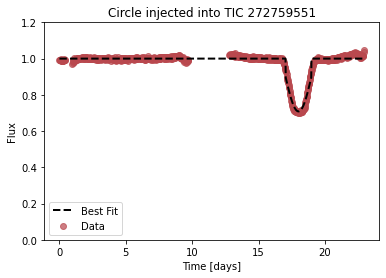

1750.7274057592288
[]


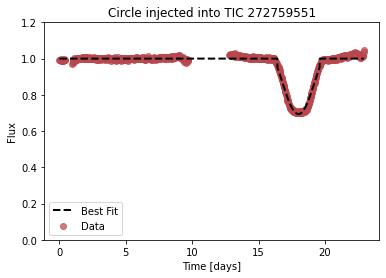

1993.8084185159857
[]


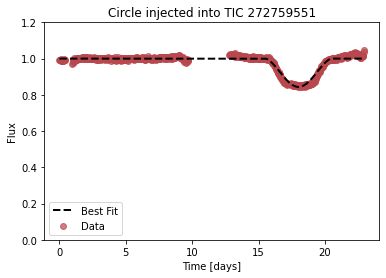

38575.39147827312
[]


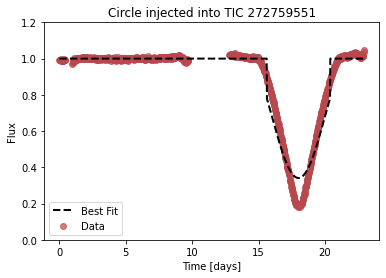

27994.40886808921
[]


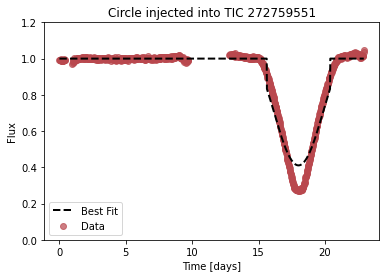

17275.80840192817
[]


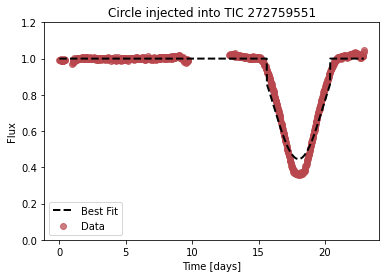

6679.790921143848
[]


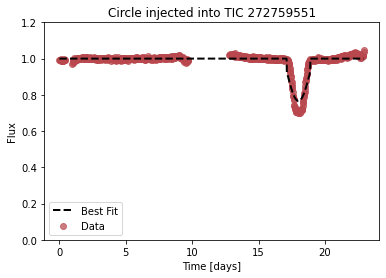

1350.5129506111011
[]


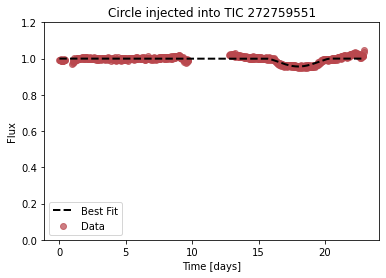

4932.1975348019405
[]


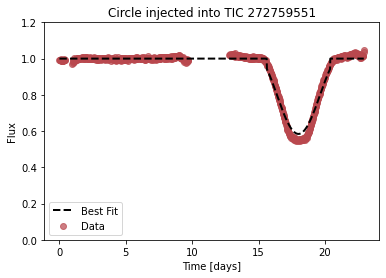

2931.556927913961
[]


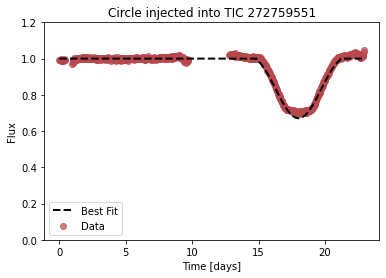

2374.847138753786
[]


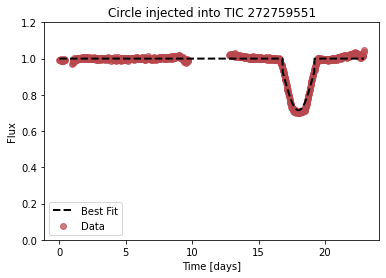

2177.6279422826083
[]


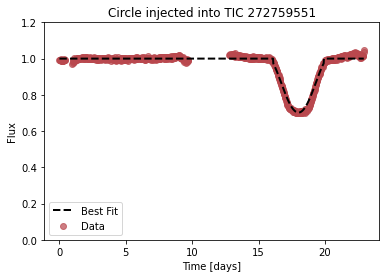

9924.179747802289
[]


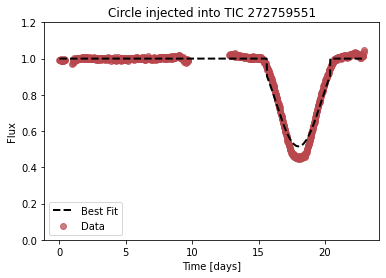

3038.7327594557005
[]


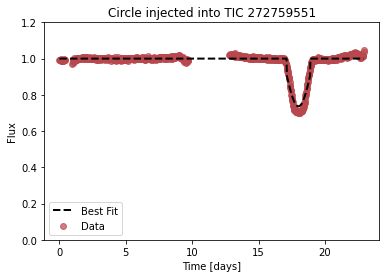

6927.09928860277
[]


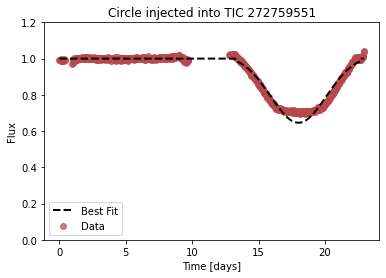

50086.37233333232
[]


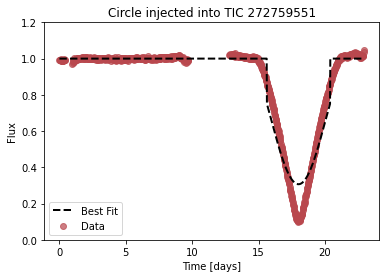

1293.9466900672994
[]


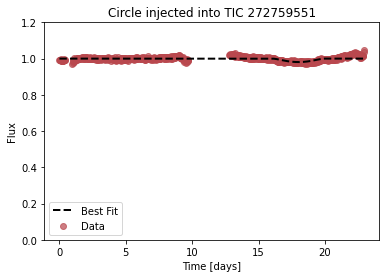

4698.469204550069
[]


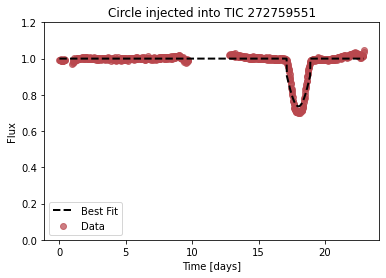

2099.840372042865
[]


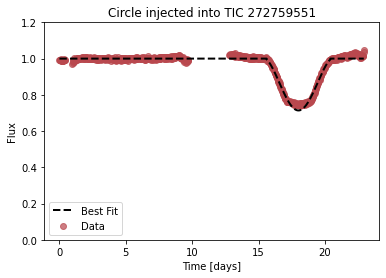

2352.6509364889816
[]


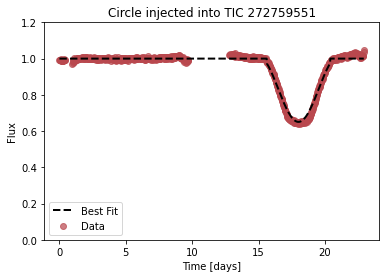

1776.3581645647973
[]


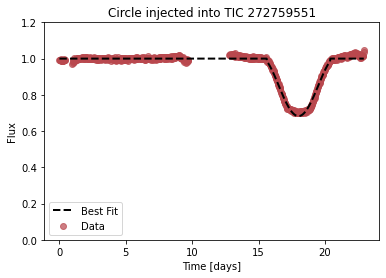

3216.413920705981
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


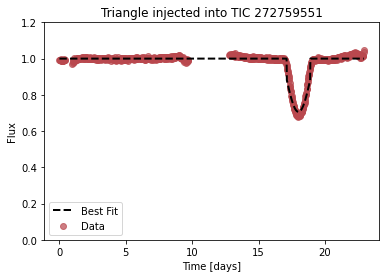

2435.31534345044
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


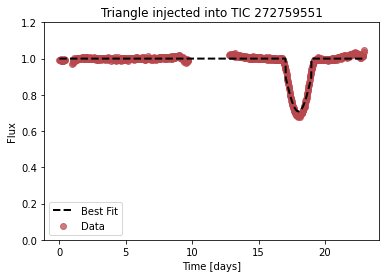

5568.948978041653
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


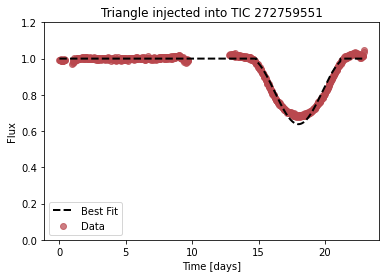

1854.733906875233
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


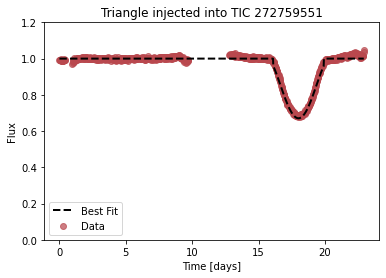

2181.0738564279873
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


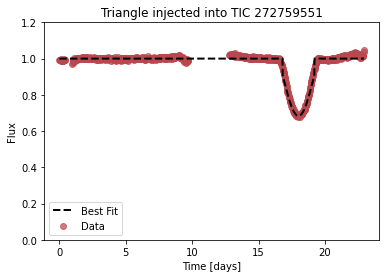

5252.444695454315
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


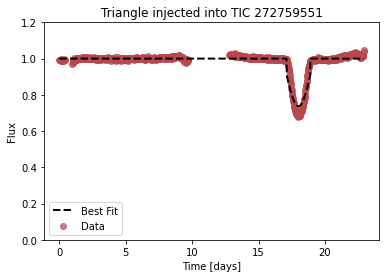

1783.451087209459
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


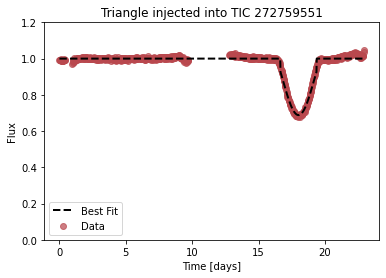

1546.6705759265144
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


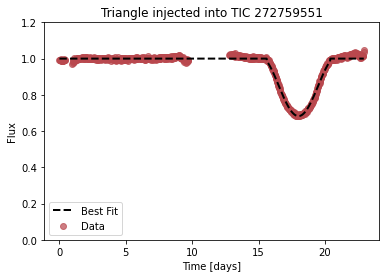

5176.805564410141
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


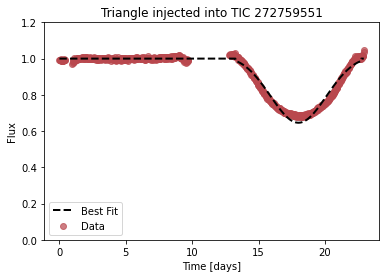

1586.018821109691
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


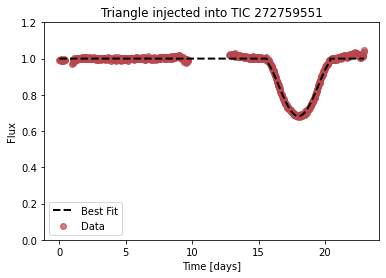

2040.7954996580024
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


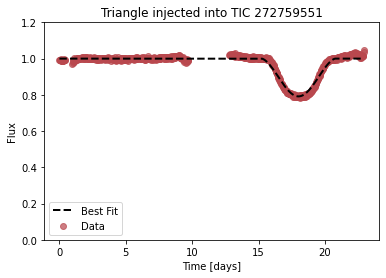

5175.591377559387
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


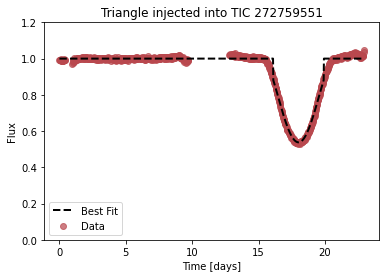

1846.063620167855
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


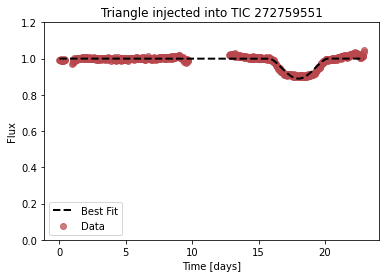

1301.8404705438122
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


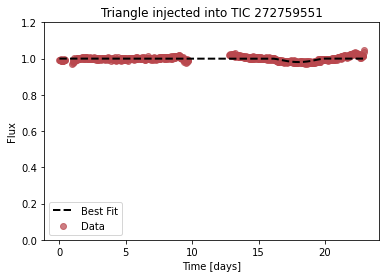

2400.487240979847
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


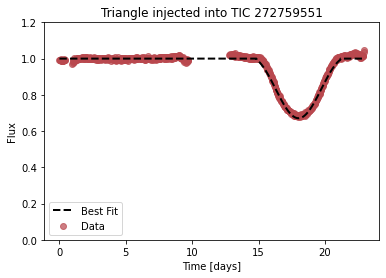

2804.2211226429245
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


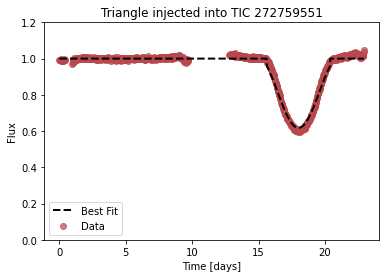

1784.3079295176299
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


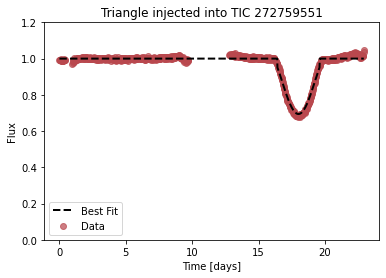

7487.135689358291
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969]]


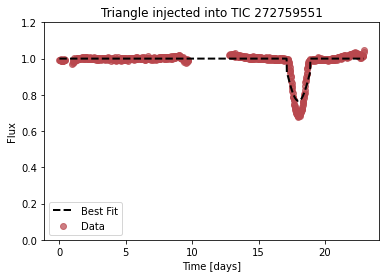

10140.469120068443
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


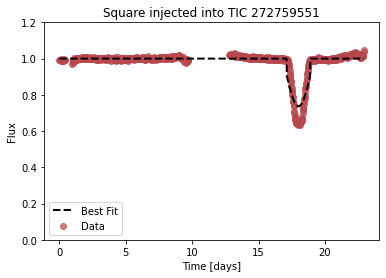

2605.876437788998
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


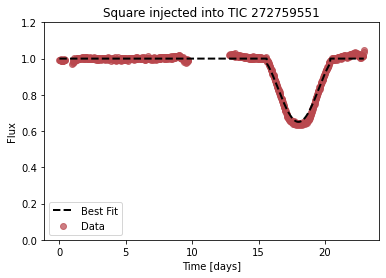

1918.8696071098436
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


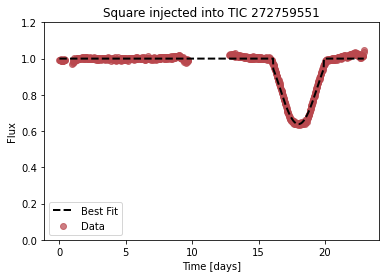

37432.049675998984
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


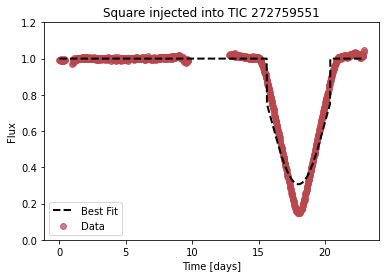

2502.7303086693905
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


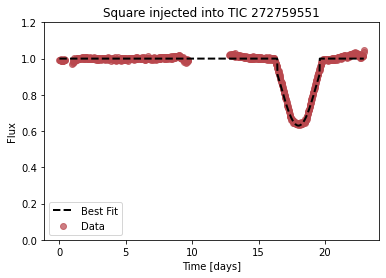

3775.929455836651
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


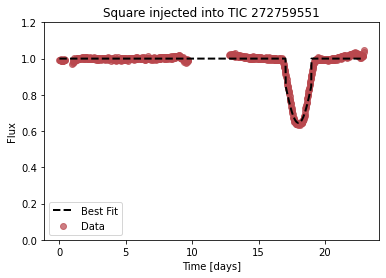

4064.4398377438406
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


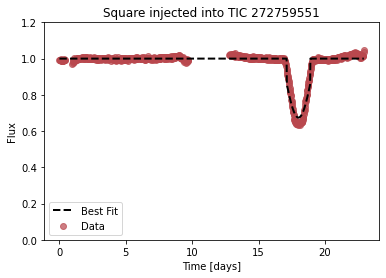

46502.22260075838
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


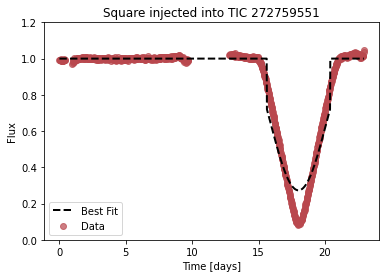

2065.9455293606916
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


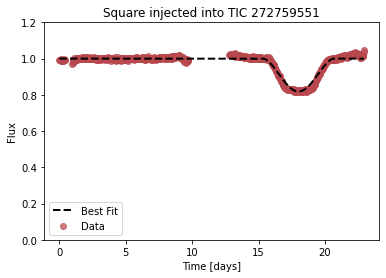

2734.890360360633
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


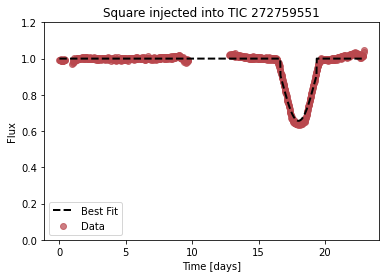

26587.829876982698
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


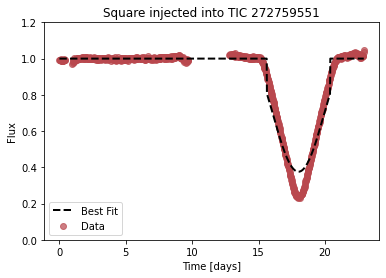

17270.282459788978
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


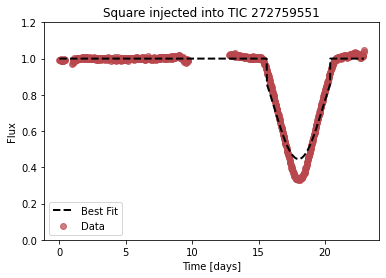

6794.304181180663
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


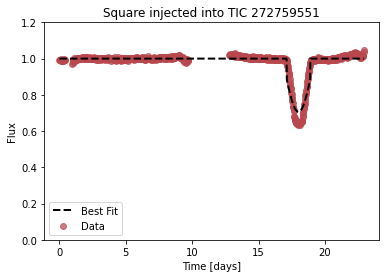

56230.33824759969
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


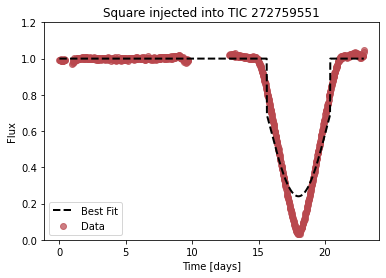

2939.491976071543
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


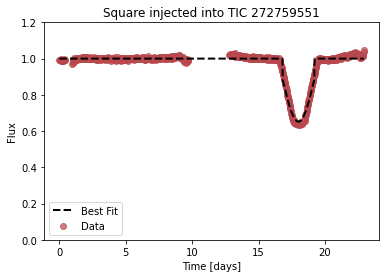

1310.331450621351
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


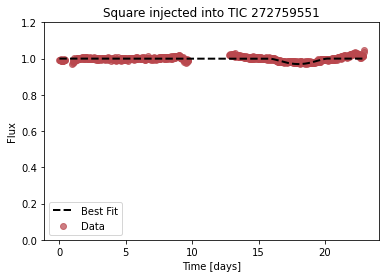

8459.319696278213
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


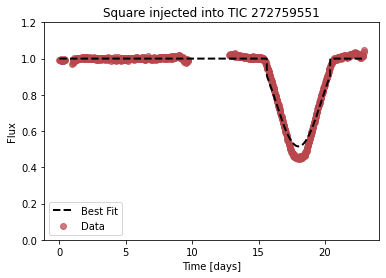

1337.8610511129252
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


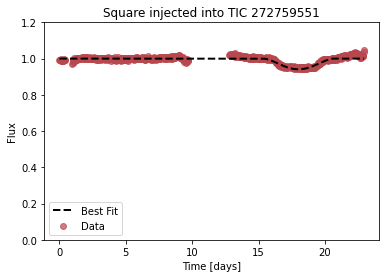

1783.2806905134537
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


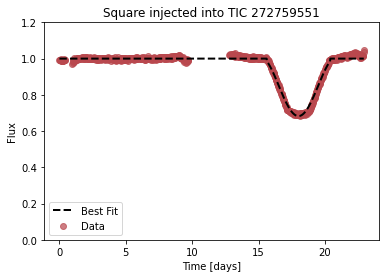

6294.272899957789
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


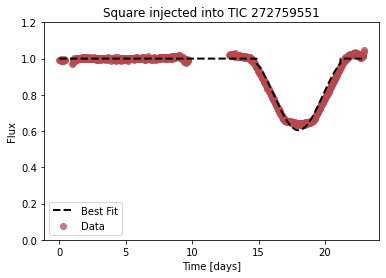

61366.94873906756
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


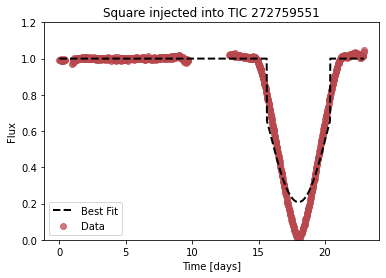

3260.589877227338
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


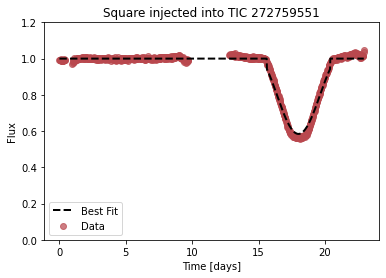

5910.204602335401
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


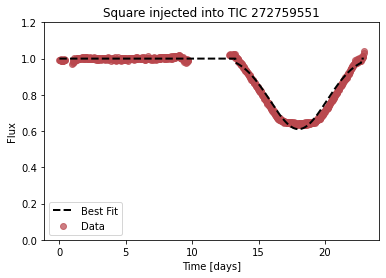

2954.0986523647866
[[0.6974134773092527, 0.0277892818166674, 0.6969304541197785, 0.6978903234013012, 0.6972859008944226, 0.8437791240632286, 0.1835939677958307, 0.2674718160418341, 0.3570796209462639, 0.698015431945618, 0.9480833660048765, 0.5445668374059087, 0.6969962022080582, 0.6975566792023624, 0.6971738729780592, 0.4480727695373099, 0.6979669205404944, 0.6961253991578495, 0.10030847033798862, 0.9712855336655071, 0.697989730973682, 0.7404878564114228, 0.6398132388396749, 0.6970773255978969], [0.678293494668648, 0.6782366912342226, 0.6774303366246752, 0.678127787970239, 0.6781872041011654, 0.678357654217275, 0.6781652535217759, 0.6804828914101395, 0.6772574261296318, 0.6778871482695967, 0.7847721306672716, 0.5289214710979768, 0.8965471990516575, 0.9712855336655071, 0.6776408222372934, 0.596197894278268, 0.6781457274234568, 0.678429560297159]]


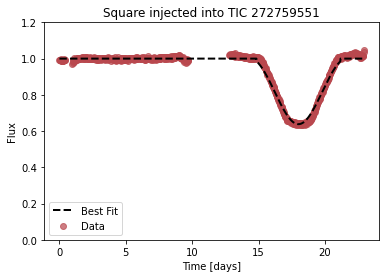

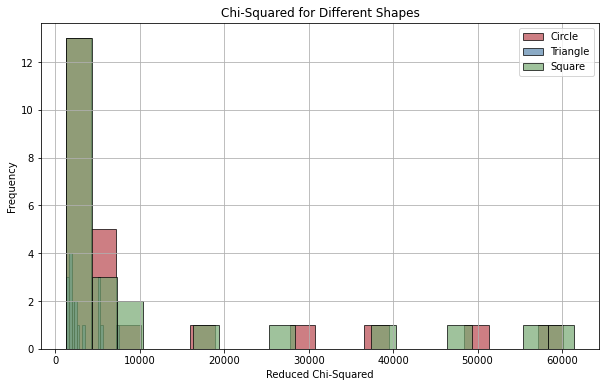

/opt/conda/envs/spocc/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

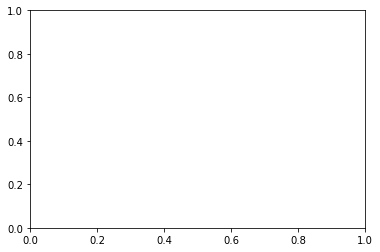

In [21]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def log_likelihood(rp, a, time, flux, flux_err):
    # Calculate the light curve using the QuadraticModel with given rp, a, and other fixed parameters
    tm = QuadraticModel()
    tm.set_data(time)
    i = 90.0  # Fixed inclination angle (90 degrees)
    lightcurve = tm.evaluate(k=rp, ldc=[0.4, 0.0], t0=18, p=30, a=a, i=i)

    # Compute the log-likelihood using the Gaussian likelihood for Gaussian noise
    residuals = flux - lightcurve  # Compute the residuals
    chi_squared = np.sum((residuals / flux_err) ** 2)  # Calculate the chi-squared value
    log_likelihood_value = -0.5 * chi_squared - 0.5 * len(time) * np.log(2 * np.pi) - np.sum(np.log(flux_err))
    return log_likelihood_value

# Define the different shapes to analyze
shapes = ['Circle', 'Triangle', 'Square']

# Define colors for the shapes in the plot
colors = ['xkcd:dusty red', 'xkcd:dusty blue', 'xkcd:dusty green']

# List to store the reduced chi-squared values for each shape
reduced_chi_squared_values = []
depths = []

for shape, color in zip(shapes, colors):
    # Get a list of all files in the current directory with the shape-specific extension
    file_list = glob.glob(f'/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs_tic272759551/{shape}*.csv')

    shape_reduced_chi_squared_values = []  # List to store the reduced chi-squared values for the current shape
    shape_depths = []

    for filename in file_list:
        # Load data from the current file
        data = np.loadtxt(filename, delimiter=',', skiprows=1)
        time=data[:,0][:-60]
        flux=data[:,1][:-60]
        flux_err=data[:,2][:-60]


        # Define the parameter grid for rp and a
        rp_values = np.linspace(0.01, 5, 100)
        a_values = np.linspace(0.01, 100, 100)

        # Perform the grid search for the current file
        max_log_likelihood = -np.inf
        best_rp = None
        best_a = None

        for rp in rp_values:
            for a in a_values:
                # Calculate the log-likelihood for the current parameter combination
                current_log_likelihood = log_likelihood(rp, a, time, flux, flux_err)

                # Update the maximum log-likelihood and best parameters if a better combination is found
                if current_log_likelihood > max_log_likelihood:
                    max_log_likelihood = current_log_likelihood
                    best_rp = rp
                    best_a = a

        # Calculate the number of data points and fitted parameters
        N = len(flux)
        k = 2  # Number of fitted parameters (rp and a)

        # Calculate the best-fit light curve using the best-fit parameters
        tm = QuadraticModel()
        tm.set_data(time)
        i = 90.0  # Fixed inclination angle (90 degrees)
        best_fit_lightcurve = tm.evaluate(k=best_rp, ldc=[0.4, 0.0], t0=18, p=30, a=best_a, i=i)

        # Compute the residuals and chi-squared value for the best-fit model
        residuals_best_fit = flux - best_fit_lightcurve
        chi_squared_best_fit = np.sum((residuals_best_fit / flux_err) ** 2)

        # Calculate the reduced chi-squared value
        reduced_chi_squared = chi_squared_best_fit #/ (N - k)
        print(reduced_chi_squared)

        # Store the reduced chi-squared value for the current file

        shape_reduced_chi_squared_values.append(reduced_chi_squared)
        shape_depths.append(np.min(flux))

        # Plot the data and the best-fit light curve for the current file (optional)
        plt.figure(figsize=(6, 4))
        plt.scatter(time, flux, color='xkcd:dusty red', label='Data', alpha=0.7)
        plt.plot(time, best_fit_lightcurve, '--k', label='Best Fit', linewidth=2)
        plt.xlabel('Time [days]')
        plt.ylabel('Flux')
        plt.ylim(0,1.2)
        plt.legend(loc='best')
        plt.title(f'{shape} injected into TIC 272759551')
        plt.show()

    # Append the reduced chi-squared values for the current shape to the main list
    reduced_chi_squared_values.append(shape_reduced_chi_squared_values)
    depths.append(shape_depths)

# Plot a histogram of the reduced chi-squared values for all shapes
plt.figure(figsize=(10, 6))
for i, shape in enumerate(shapes):
    plt.hist(reduced_chi_squared_values[i], bins=20, alpha=0.7, color=colors[i], edgecolor='black', label=shape)
plt.xlabel('Reduced Chi-Squared')
plt.ylabel('Frequency')
plt.title('Chi-Squared for Different Shapes')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(reduced_chi_squared_values, depths)

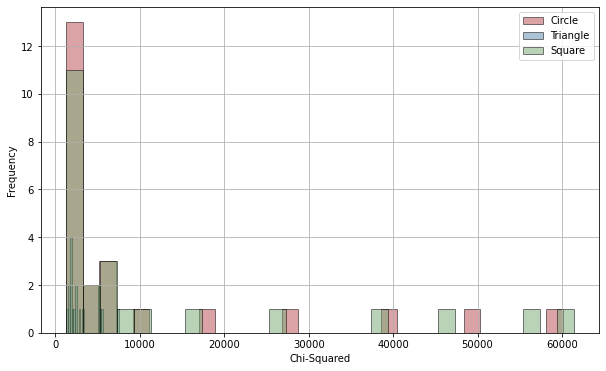

[[1916.5028945335723, 60114.40519946138, 6756.898737919026, 2346.062619505941, 1750.7274057592288, 1993.8084185159857, 38575.39147827312, 27994.40886808921, 17275.80840192817, 6679.790921143848, 1350.5129506111011, 4932.1975348019405, 2931.556927913961, 2374.847138753786, 2177.6279422826083, 9924.179747802289, 3038.7327594557005, 6927.09928860277, 50086.37233333232, 1293.9466900672994, 4698.469204550069, 2099.840372042865, 2352.6509364889816, 1776.3581645647973], [3216.413920705981, 2435.31534345044, 5568.948978041653, 1854.733906875233, 2181.0738564279873, 5252.444695454315, 1783.451087209459, 1546.6705759265144, 5176.805564410141, 1586.018821109691, 2040.7954996580024, 5175.591377559387, 1846.063620167855, 1301.8404705438122, 2400.487240979847, 2804.2211226429245, 1784.3079295176299, 7487.135689358291], [10140.469120068443, 2605.876437788998, 1918.8696071098436, 37432.049675998984, 2502.7303086693905, 3775.929455836651, 4064.4398377438406, 46502.22260075838, 2065.9455293606916, 2734.

Text(0, 0.5, 'Chi-Squared')

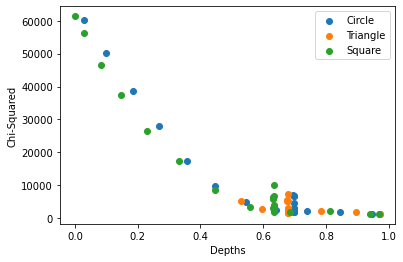

In [30]:
shapes = ['Circle', 'Triangle', 'Square']
# Plot a histogram of the reduced chi-squared values for all shapes
plt.figure(figsize=(10, 6))
for i, shape in enumerate(shapes):
    plt.hist(reduced_chi_squared_values[i], bins=30, alpha=0.5, color=colors[i], edgecolor='black', label=shape)
plt.xlabel('Chi-Squared')
plt.ylabel('Frequency')
#plt.title('Histogram of Reduced Chi-Squared for Different Shapes')
plt.legend()
plt.grid(True)
plt.show()
print(reduced_chi_squared_values)
print(depths)
for i, shape in enumerate(shapes):
    plt.scatter(depths[i], reduced_chi_squared_values[i], label = shape)
plt.legend()
plt.xlabel('Depths')
plt.ylabel('Chi-Squared')

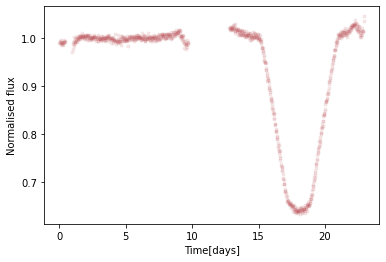

In [334]:
def f_lightcurve(time,period,rp,a,inc):#,ecc,omega):
    """
    Function for computing transit models for the set of 8 free paramters
    x - time array
    """
    tm = QuadraticModel()
    tm.set_data(time)
    #om=omega/180*np.pi
    i=inc/180.0*np.pi
    lightcurve=tm.evaluate(k=rp, ldc=[0.0, 0.0], t0=18, p=period, a=a, i=i)#,e=ecc,w=om)
    return lightcurve

#Plotting the lightcurve first, just to see what it looks like!
plt.plot(time,flux,".", color='xkcd:dusty red', label='Data', alpha=0.1)
plt.xlabel("Time[days]")
plt.ylabel("Normalised flux")
plt.show()

NameError: name 'f_lightcurve' is not defined

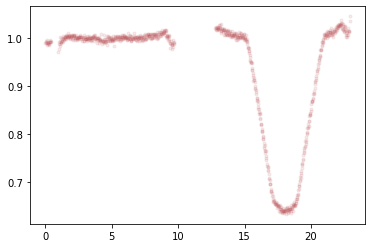

In [5]:
#HERE IS WHERE YOU ENTER YOUR GUESSES, FOR NUMBER 1
guess_period=30
guess_ronr=1
guess_aonr=2.5
guess_inc=90.0
#guess_ecc=0.1
#guess_omega=240

#Don't need to alter below here in this cell-------
guess=[guess_period, guess_ronr, guess_aonr, guess_inc]#,guess_ecc,guess_omega]

## Phasefold data time-array
phase = (time) % guess[0] / guess[0]
phase[np.where(phase>0.5)] -= 1 
sorted = np.argsort(phase)

plt.plot(time,flux,".", color='xkcd:dusty red', label='Data', alpha=0.1)
guess_lightcurve=f_lightcurve(time,*guess)
plt.plot(time,guess_lightcurve,'--k', label='Guess fit')
plt.legend(loc="lower left")
plt.ylabel("Normalised flux")
plt.xlabel("Time [days]")
plt.show()

## Plot data & model together, phase fold
plt.plot(phase*guess[0], flux, ".", color='xkcd:dusty red', label='Phase folded data', alpha=0.1)
plt.plot(phase[sorted]*guess[0], guess_lightcurve[sorted], '--k', label='Guess fit')
plt.legend(loc="lower left")
#plt.xlim(-0.1, 0.1)
plt.xlabel("Time from central transit [days]")
plt.ylabel("Normalised flux")

plt.show()

In [161]:
#No need to alter anything in this cell
#This function bins the data, in order to save processing time during the MCMC fit
def rebin(nbin,time,flux):
    start_interval=time[1]-time[0]
    bin_interval=(start_interval)*nbin
    flux_bin=[]
    time_bin=[]
    err_bin=[]
    tmax=np.min(time)
    i=0
    while tmax<np.max(time):
        bincenter=np.min(time)+(i+0.5)*bin_interval
        index=np.where(np.abs(time-bincenter) < bin_interval/2.0)
        if len(time[index]):
            flux_bin=np.append(flux_bin,np.mean(flux[index]))
            time_bin=np.append(time_bin,np.mean(time[index]))
            err_bin=np.append(err_bin,np.std(flux[index])) 
            tmax=np.max(time[index])        
        i=i+1

    return time_bin,flux_bin,err_bin
        
#This bins to roughly one point every 5 minutes, though you can try different bins if you like!
time_bin,flux_bin,err_bin=rebin(5,time,flux)

In [162]:
#No need to alter anything in this cell
#How much can the MCMC stray from the original guesses? 
priors = [guess_period*0.9, guess_period*1.1,
          guess_ronr*0.5,guess_ronr*1.5,
         guess_aonr*0.3,guess_aonr*3.0,
         0, 90,
         0,0.99 ,
         0, 360]

#This function calculates the ``goodness of fit" of the model, using chi-squared
def log_likelihood(theta, time, flux, flux_err):
#     t0, per, rp, a, inc, ecc, w, baseline = theta
    model = f_lightcurve(time, *theta)
    sigma2 = flux_err ** 2 
    return -0.5 * np.sum((flux - model) ** 2 / sigma2 + np.log(2. * np.pi*sigma2))

#This function tells the code to spit the guess back if it wanders outside the acceptable range 
def log_prior(theta):
    # The parameters are stored as a vector of values, so unpack them
    per, rp, a, inc = theta
    # We're using only uniform priors:
    if priors[0] > per or per > priors[1]:
        return -np.inf
    if priors[2] > rp or rp > priors[3]:
        return -np.inf
    if priors[4] > a or a > priors[5]:
        return -np.inf
    if priors[6] > inc or inc > priors[7]:
        return -np.inf
    #if priors[8] > ecc or ecc > priors[9]:
    #    return -np.inf
    #if priors[10] > w or w > priors[11]:
    #    return -np.inf  
    return 0.0

## The full log-probability function is:
def log_probability(theta, time, flux, flux_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    #print(log_likelihood(theta, time, flux, flux_err))
    return lp + log_likelihood(theta, time, flux, flux_err)

In [163]:
#No need to alter anything in this cell
#This one may take a while to run!
#We have six dimensions, for each of the parameters we're fitting!
ndim = 4
nwalkers = ndim*8  # Number of walkers. It is recommended to be at least higher than twice 
                   # the amount of parameters being fit

# theta = [period, rp/Rstar, a/Rstar, inc, ecc, omega]
#How close to the original guess should I start exploring, for each parameter?
order_of_mag = np.array([1e-3, 1e-3, 0.5, 1e-3])
#print( np.random.randn(nwalkers, ndim))
pos = guess+ order_of_mag * np.random.randn(nwalkers, ndim)

#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time_bin, flux_bin, err_bin))
#sampler.run_mcmc(pos, 10000, progress=True)

#If your computer has multiprocessing capabilities, you can comment out the lines below instead of 
#using the two lines of code immediately above this. It will go faster!
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time_bin, flux_bin, err_bin),pool=pool)
    sampler.run_mcmc(pos, 10000, progress=True)

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from 

ValueError: Probability function returned NaN

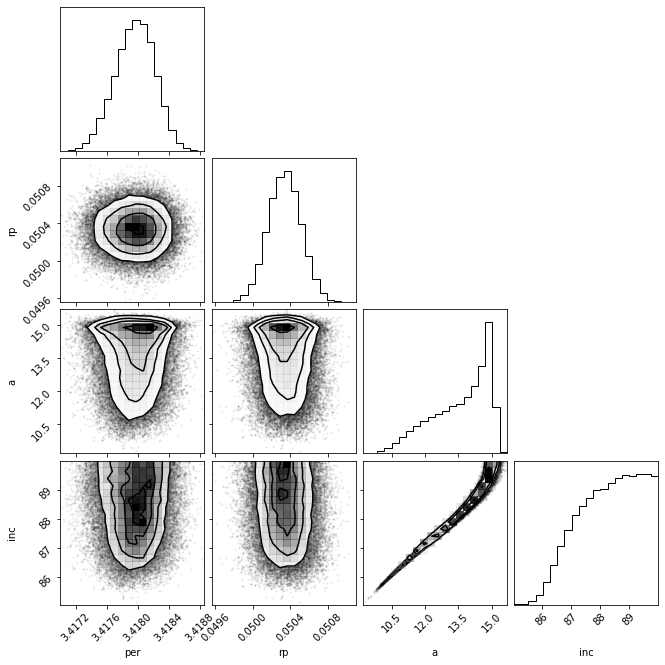

In [57]:
#No need to alter anything in this cell
flat_samples = sampler.get_chain(discard=200, thin=5, flat=True)
log_prob = sampler.get_log_prob(discard=200, thin=5, flat=True)


#This line saves your MCMC samples, since the cell above may have taken a long time to run!
savetxt('MCMC_samples.csv', flat_samples, delimiter=',')

labels = ["per", "rp", "a", "inc"]#,"ecc", "w" ]

fig = corner.corner(flat_samples, labels=labels)


Text(0, 0.5, 'Likelihood')

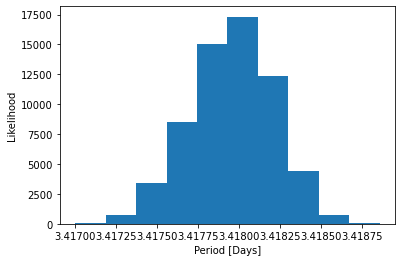

In [58]:
period_samples=flat_samples[:,0]
ronr_samples=flat_samples[:,1]
aonr_samples=flat_samples[:,2]
inc_samples=flat_samples[:,3]
#ecc_samples=flat_samples[:,4]
#omega_samples=flat_samples[:,5]
likely_set = log_prob

#Use your array of values for each parameter to determine the likeliest one! See below for a 
#histogram of the guesses for period
plt.hist(period_samples)
plt.xlabel('Period [Days]')
plt.ylabel('Likelihood')

In [59]:

print(len(likely_set), len(period_samples))
final_data = pd.DataFrame({'Likelihood' : likely_set, 'Period' : period_samples, 'RonR' : ronr_samples, 'AonR' : aonr_samples, 'Inclination' : inc_samples})
final_data = final_data.sort_values(by=['Likelihood'], ascending=False)
final_data = final_data.reset_index(drop=True)

drops = len(final_data) * .68
final_data = final_data.iloc[0:int(drops), :] #keep only top 68% of answers

best_likelihood = final_data['Likelihood'].idxmin() #min value because the likelihoods are negative for some reason
print('Most likely parameter sets in order are:')
print(final_data.iloc[[0,1,2,3,4,5,6,7,8,9,10661]])
print()
print("Error bar minimums are:")
print(final_data.min())
print()
print("Error bar maximums are:")
print(final_data.max())


period_likeliest_guess = final_data.iloc[0]['Period']
ronr_likeliest_guess = final_data.iloc[0]['RonR']
aonr_likeliest_guess = final_data.iloc[0]['AonR']
inc_likeliest_guess = final_data.iloc[0]['Inclination']

62720 62720
Most likely parameter sets in order are:
         Likelihood    Period      RonR       AonR  Inclination
0      16526.065460  3.417988  0.050355  11.808334    86.975013
1      16526.058721  3.417963  0.050346  11.747181    86.935067
2      16526.055268  3.417955  0.050336  11.792339    86.961483
3      16526.055117  3.417976  0.050319  11.873708    87.019321
4      16526.052909  3.417948  0.050349  11.911452    87.042432
5      16526.049283  3.417958  0.050353  11.931361    87.061489
6      16526.049235  3.417974  0.050347  11.936088    87.050509
7      16526.047159  3.417968  0.050317  11.973135    87.084614
8      16526.045332  3.417939  0.050347  11.852053    87.000206
9      16526.045101  3.417973  0.050351  11.662211    86.881406
10661  16525.272333  3.417735  0.050343  13.271299    87.957658

Error bar minimums are:
Likelihood     16524.022005
Period             3.417400
RonR               0.050000
AonR              10.017926
Inclination       85.736229
dtype: float64

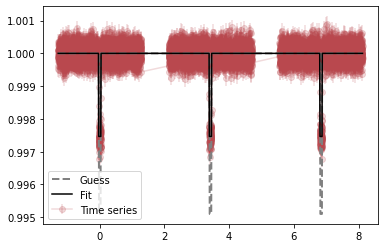

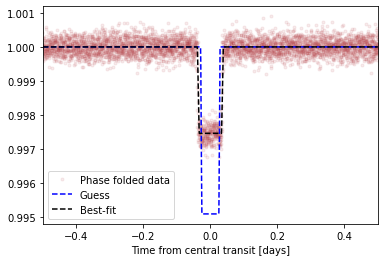

In [61]:
#Extract the likeliest values for your 6 parameters and enter them into this array!
fit=[period_likeliest_guess,ronr_likeliest_guess,aonr_likeliest_guess,inc_likeliest_guess]

#Generating a lightcurve from your guess
flux_guess = f_lightcurve(time, *guess)
plt.plot(time, flux_guess, '--', color='gray', label='Guess', lw=2, zorder=3)

#Generating a lightcurve from your best fit
flux_fit = f_lightcurve(time, *fit )
plt.plot(time, flux_fit, 'k', label='Fit', lw=1.5, zorder=10)

plt.errorbar(time, flux, flux_err,marker="o", color='xkcd:dusty red', label='Time series', alpha=0.2)
plt.legend()
plt.show()

## Phasefold data time-array
phase_fit = (time) % fit[0] / fit[0]
phase_fit[np.where(phase_fit>0.5)] -= 1 
sorted_fit = np.argsort(phase_fit)

## Plot data & model together, phase fold
plt.plot(phase*fit[0], flux, ".", color='xkcd:dusty red', label='Phase folded data', alpha=0.1)
plt.plot(phase[sorted]*guess[0], flux_guess[sorted], '--b', label='Guess')
plt.plot(phase_fit[sorted_fit]*fit[0], flux_fit[sorted_fit], '--k', label='Best-fit')
plt.legend()
plt.xlim(-0.5, 0.5)
plt.xlabel("Time from central transit [days]")
plt.show()